# Data Grouping and Filtering

Another quite popular operations to perform on data are **grouping** and **filtering**.
The former is used to group values into mulitple subgroups and operate on specific groups; the latter is to dwelve into data based on specific categories or filters on values.
Most of the time, these two operations are performed together.

Pandas allows to do group and filtering, thanks to the `groupby` and `filter` functions. 

We will see examples in this notebook.

**Note** 

In this notebook, we will be using `numpy.random` functions for random selection of values and random number generations to work on fake data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female']

In [5]:
income_data[1:10]

['Middle Class',
 'Rich',
 'Middle Class',
 'Poor',
 'Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Poor']

In [6]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,113.610404,54.713243,31.510895,18275.673100
1,Male,Middle Class,158.788009,80.454545,33.779881,20348.245269
2,Male,Rich,163.752057,16.262011,12.568956,20203.859943
3,Male,Middle Class,188.560796,79.577245,45.708096,20449.554905
4,Female,Poor,154.201270,64.773579,18.128407,18939.175226


## Data Grouping

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  4,   8,   9,  11,  16,  19,  20,  21,  22,  23,
             ...
             482, 483, 487, 488, 489, 491, 492, 497, 498, 499],
            dtype='int64', length=249),
 'Male': Int64Index([  0,   1,   2,   3,   5,   6,   7,  10,  12,  13,
             ...
             477, 478, 484, 485, 486, 490, 493, 494, 495, 496],
            dtype='int64', length=251)}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
4    Female            Poor  154.201270   64.773579  18.128407  18939.175226
8    Female    Middle Class  141.901217   94.592445  35.909487  18547.925693
9    Female            Poor  155.973989   42.445218  60.714859  20477.774021
11   Female    Middle Class  160.099266   85.307261  23.019224  19636.421340
16   Female            Poor  131.035101   14.438118  26.153362  18589.175187
19   Female            Poor  187.240737   44.851005  22.572673  20152.079881
20   Female    Middle Class  167.446650   54.604931  23.666471  20124.137860
21   Female            Rich  172.315645   94.411556  36.322478  21019.577180
22   Female            Poor  143.906784   47.746259  45.553985  19155.256573
23   Female            Rich  215.422582   76.389746  34.461196  19120.056348
24   Female    Middle Class  184.805396   47.327133  33.863233  20076.065171
25   Female            Rich  163.806122   47.938960  31.776821  19901

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
4,Female,Poor,154.201270,64.773579,18.128407,18939.175226
8,Female,Middle Class,141.901217,94.592445,35.909487,18547.925693
9,Female,Poor,155.973989,42.445218,60.714859,20477.774021
11,Female,Middle Class,160.099266,85.307261,23.019224,19636.421340
16,Female,Poor,131.035101,14.438118,26.153362,18589.175187
19,Female,Poor,187.240737,44.851005,22.572673,20152.079881
20,Female,Middle Class,167.446650,54.604931,23.666471,20124.137860
21,Female,Rich,172.315645,94.411556,36.322478,21019.577180
22,Female,Poor,143.906784,47.746259,45.553985,19155.256573
23,Female,Rich,215.422582,76.389746,34.461196,19120.056348


In [13]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
8    Female    Middle Class  141.901217   94.592445  35.909487  18547.925693
11   Female    Middle Class  160.099266   85.307261  23.019224  19636.421340
20   Female    Middle Class  167.446650   54.604931  23.666471  20124.137860
24   Female    Middle Class  184.805396   47.327133  33.863233  20076.065171
33   Female    Middle Class  174.491095   91.738010  48.551122  19589.674526
41   Female    Middle Class  137.870929   82.851892  22.303763  18819.570462
50   Female    Middle Class  140.615757   68.446455  30.755874  20507.560679
51   Female    Middle Class  191.824255   -1.118708  44.027324  20004.338194
59   Female    Middle Class  169.498917   43.657860  19.970363  18872.225397
69   Female    Middle Class  157.066733   82.404402  12.766940  18114.012594
74   Female    Middle Class  116.718823   69.208326  28.274495  21227.133094
83   Female    Middle Class  136.072359   53.8859

## Operations on Groups

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15144.651464  5864.708793  2859.281690  1.851105e+06
       Poor             13026.263504  5232.842158  2370.446759  1.585298e+06
       Rich             11985.864478  4991.142125  2571.139441  1.482650e+06
Male   Middle Class     12960.882865  5233.204139  2239.098052  1.612740e+06
       Poor             12733.812397  5402.731208  2350.434395  1.594591e+06
       Rich             14153.001560  5710.768998  2633.493626  1.769393e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     161.113313  62.390519  30.417890  19692.601717
       Poor             162.828294  65.410527  29.630584  19816.228165
       Rich             159.811526  66.548562  34.281859  19768.663897
Male   Middle Class     160.010900  64.607459  27.643186  19910.373231
       Poor             157.207560  66.700385  29.017709  19686.308527
       Rich             159.022489  64.165944  29.589816  19880.816402

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       94
        Poor               80
        Rich               75
Male    Middle Class       81
        Poor               81
        Rich               89
dtype: int64

In [19]:
double_group.describe()

Age                                             \
                       count       mean        std       min        25%   
Gender Economic Status                                                    
Female Middle Class     94.0  30.417890  12.646938 -0.031549  23.202893   
       Poor             80.0  29.630584  11.959125  5.752287  20.935073   
       Rich             75.0  34.281859  10.517087  7.927908  27.802782   
Male   Middle Class     81.0  27.643186  12.066625 -1.579507  20.167644   
       Poor             81.0  29.017709  10.693500  3.585976  23.308689   
       Rich             89.0  29.589816  12.228048  1.982581  21.396562   

                                                        Height              \
                              50%        75%        max  count        mean   
Gender Economic Status                                                       
Female Middle Class     31.234211  37.475184  65.224461   94.0  161.113313   
       Poor             29.104283  37.173351  60.714859   80.0  162.828294   
       Rich             33.865823  40.727675  63.080073   75.0  159.811526   
Male   Middle Class     26.399033  33.779881  61.150171   81.0  160.010900   
       Poor             29.134227  36.550611  54.889783   81.0  157.207560   
       Rich             28.622834  37.014439  58.411119   89.0  159.022489   

                           ...            Income               Weight  \
                           ...               75%           max  count   
Gender Economic Status     ...                                          
Female Middle Class        ...      20510.501589  21461.155589   94.0   
       Poor                ...      20639.365728  21493.664672   80.0   
       Rich                ...      20405.071759  21442.610344   75.0   
Male   Middle Class        ...      20781.523346  21498.775963   81.0   
       Poor                ...      20526.277809  21487.824907   81.0   
       Rich                ...      20646.661195  21475.055760   89.0   

                                                                               \
                             mean        std        min        25%        50%   
Gender Economic Status                                                          
Female Middle Class     62.390519  25.858679  -1.118708  42.558637  63.330779   
       Poor             65.410527  24.878761  14.438118  47.040880  63.602273   
       Rich             66.548562  23.315898  12.797441  53.514436  67.770416   
Male   Middle Class     64.607459  25.847374   7.133256  46.103771  60.312391   
       Poor             66.700385  27.989297 -11.646907  46.508956  71.305495   
       Rich             64.165944  24.609678  -1.847177  45.902004  61.659812   

                                               
                              75%         max  
Gender Economic Status                         
Female Middle Class     81.916383  133.404210  
       Poor             81.659305  142.551646  
       Rich             79.788093  126.903599  
Male   Middle Class     83.845454  120.653579  
       Poor             86.283461  117.418754  
       Rich             82.041195  111.965563  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      94.0  19692.601717  1000.126939  18107.749022   
       Poor              80.0  19816.228165   991.059465  18002.281801   
       Rich              75.0  19768.663897   988.164999  18015.470680   
Male   Middle Class      81.0  19910.373231   963.933458  18003.931338   
       Poor              81.0  19686.308527  1001.075773  18028.985765   
       Rich              89.0  19880.816402  1001.150041  18049.665059   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18816.120847  19763.033548  20510.501589  21461.155589  
       Poor             18936.874978  19820.092154  20639.365728  21493.664672  
       Rich             19048.112337  19750.646957  20405.071759  21442.610344  
Male   Middle Class     19153.046373  19840.861224  20781.523346  21498.775963  
       Poor             18773.303509  19737.687335  20526.277809  21487.824907  
       Rich             19137.575315  20017.295845  20646.661195  21475.055760

In [22]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.851105e+06  30.417890  27.951270
       Poor             1.585298e+06  29.630584  28.571600
       Rich             1.482650e+06  34.281859  30.290977
Male   Middle Class     1.612740e+06  27.643186  27.220838
       Poor             1.594591e+06  29.017709  30.098880
       Rich             1.769393e+06  29.589816  29.581888

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.417890  5.794985
       Poor             29.630584  5.734912
       Rich             34.281859  5.311407
Male   Middle Class     27.643186  5.914875
       Poor             29.017709  5.255580
       Rich             29.589816  5.406128

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     15144.651464  161.113313  27.951270  5864.708793   
       Poor             13026.263504  162.828294  28.571600  5232.842158   
       Rich             11985.864478  159.811526  30.290977  4991.142125   
Male   Middle Class     12960.882865  160.010900  27.220838  5233.204139   
       Poor             12733.812397  157.207560  30.098880  5402.731208   
       Rich             14153.001560  159.022489  29.581888  5710.768998   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     62.390519  25.858679  2859.281690  30.417890   
       Poor             65.410527  24.878761  2370.446759  29.630584   
       Rich             66.548562  23.315898  2571.139441  34.281859   
Male   Middle Class     64.607459  25.847374  2239.098052  27.643186   
       Poor             66.700385  27.989297  2350.434395  29.017709   
       Rich             64.165944  24.609678  2633.493626  29.589816   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.646938  1.851105e+06  19692.601717  1000.126939  
       Poor             11.959125  1.585298e+06  19816.228165   991.059465  
       Rich             10.517087  1.482650e+06  19768.663897   988.164999  
Male   Middle Class     12.066625  1.612740e+06  19910.373231   963.933458  
       Poor             10.693500  1.594591e+06  19686.308527  1001.075773  
       Rich             12.228048  1.769393e+06  19880.816402  1001.150041

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.794985  2.425687  2.418055  19.795680
       Poor             5.734912  2.645759  2.493287  20.121147
       Rich             5.311407  2.873434  3.281585  20.140146
Male   Middle Class     5.914875  2.515149  2.305153  20.784035
       Poor             5.255580  2.397915  2.730491  19.787679
       Rich             5.406128  2.622119  2.433542  19.970490

## Data Filtering

In [35]:
double_group["Age"].filter(lambda x: x.sum()>2400)

2      41.632979
4      43.779882
5      31.511689
7      26.818594
11     29.470434
12     34.334233
13     28.286581
15     15.307572
16     36.066909
19     32.509053
21     31.443146
22     24.546463
23     26.854852
24     36.759814
25     38.453075
26     21.995241
30     15.223665
31     42.708940
32     38.673025
34     25.671351
37     22.565455
38     43.565371
40     33.373076
42     29.022916
43     45.449231
48     37.065833
52     33.259760
54     29.244240
55     30.241688
56     34.069823
         ...    
452    12.965592
453    45.605468
455     9.504070
456    33.693360
458     4.577901
460    32.993292
461    33.710923
462    26.702841
464    10.639621
465    38.493342
466    44.073311
467    46.494498
468    28.763444
470    30.877809
471    22.482854
472    14.041959
481    19.399664
482    42.230758
483    30.346778
484    51.116700
485    12.241652
486    38.130804
488    37.119624
490    23.325366
491    28.190877
494    31.182845
495    38.516231
497    36.6081

## Transforming variables

In [26]:
zscore = lambda x : (x - x.mean())/x.std()

In [27]:
z_group = double_group.transform(zscore)

In [28]:
import matplotlib.pyplot as plt

(array([ 12.,  27.,  48.,  84., 118.,  91.,  58.,  35.,  19.,   8.]),
 array([-2.50582245, -1.97755705, -1.44929164, -0.92102624, -0.39276083,
         0.13550457,  0.66376997,  1.19203538,  1.72030078,  2.24856619,
         2.77683159]),
 <a list of 10 Patch objects>)

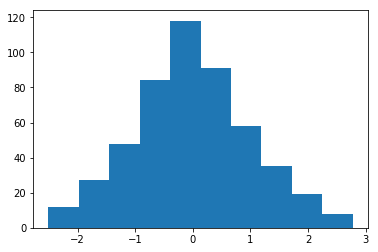

In [29]:
plt.hist(z_group["Age"])

In [30]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [31]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,113.610404,54.713243,31.510895,18275.673100
1,158.788009,80.454545,33.779881,20348.245269
2,163.752057,16.262011,12.568956,20203.859943
3,188.560796,79.577245,45.708096,20449.554905
4,154.201270,64.773579,18.128407,18939.175226
5,120.509178,46.103771,-1.579507,21276.933869
6,188.467222,40.734798,40.270153,19363.912802
7,208.302605,46.123681,39.755868,18470.799943
8,141.901217,94.592445,35.909487,18547.925693
9,155.973989,42.445218,60.714859,20477.774021


## Other operations on data and groups

In [32]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,113.610404,54.713243,31.510895,18275.673100
1,Male,Middle Class,158.788009,80.454545,33.779881,20348.245269
4,Female,Poor,154.201270,64.773579,18.128407,18939.175226
8,Female,Middle Class,141.901217,94.592445,35.909487,18547.925693
14,Male,Poor,192.349923,46.508956,23.522048,18376.162414
21,Female,Rich,172.315645,94.411556,36.322478,21019.577180


In [33]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
490,Male,Poor,114.825733,74.375325,3.585976,21058.486817
491,Female,Poor,130.079749,60.964396,22.096434,18082.770405
492,Female,Middle Class,175.946332,65.360729,37.371612,18814.970976
495,Male,Middle Class,156.232433,110.397203,24.412702,19666.959344
496,Male,Rich,137.786228,108.912547,14.255124,20621.224218
499,Female,Rich,163.808462,51.668898,17.885594,19319.820731


In [34]:
double_group.nth(32)

Age      Height        Income     Weight
Gender Economic Status                                                
Female Middle Class     23.657576  119.762925  20295.159113  83.855747
       Poor              7.923221  206.280574  18929.974231  78.260976
       Rich             35.170057  160.584332  20980.645320  84.747822
Male   Middle Class     22.395082  198.074501  19162.689209  41.015379
       Poor             22.244963  143.575280  19731.359699  40.348761
       Rich             24.259907  184.911778  20996.732159  81.172281

In [35]:
double_group.nth(82)

,,Age,Height,Income,Weight
Gender,Economic Status,,,,
Female,Middle Class,25.016806,179.643829,21199.357699,30.701548
Male,Rich,27.372951,136.813721,20212.321253,106.117012


In [36]:
data_sorted = data.sort_values(["Age", "Income"])

In [37]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
5,Male,Middle Class,120.509178,46.103771,-1.579507,21276.933869
185,Female,Middle Class,180.574325,95.486608,-0.031549,18969.181008
149,Male,Rich,150.459564,54.138043,1.982581,20646.661195
250,Female,Middle Class,134.622862,22.502657,2.789462,18992.516461
490,Male,Poor,114.825733,74.375325,3.585976,21058.486817
466,Female,Middle Class,158.229199,73.632083,3.609291,18276.133871
435,Female,Middle Class,152.886994,88.247497,4.638090,19820.051191
104,Female,Middle Class,147.982950,47.754730,4.905929,21186.010476
257,Male,Middle Class,163.460544,58.646658,5.273651,18758.802822
386,Male,Middle Class,140.652228,92.171516,5.506435,18381.574825


In [38]:
age_grouped = data_sorted.groupby("Gender")

In [39]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
5,Male,Middle Class,120.509178,46.103771,-1.579507,21276.933869
185,Female,Middle Class,180.574325,95.486608,-0.031549,18969.181008


In [40]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
328,Male,Middle Class,112.126142,50.390072,61.150171,20781.523346
200,Female,Middle Class,176.731330,48.832824,65.224461,19764.167196
